## Converting Matlab assingment into python code

In [1]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split


In [6]:
file_path = r"C:\Users\gprak\Downloads\BITS Courses\CS F464 Machine Learning I\data\data.xlsx"
df = pd.read_excel(file_path,header=None)

In [7]:
df

,0,1,2
0,2.6,1360.00,13.600
1,2.0,1292.25,13.300
2,2.2,1402.00,11.900
3,2.2,1375.50,11.000
4,1.6,1272.25,11.150
...,...,...,...
344,0.7,902.00,9.100
345,0.7,921.25,9.475
346,0.5,858.25,9.325
347,0.5,878.00,9.900


In [8]:
col = list(df.columns)

In [9]:
col

[0, 1, 2]

In [10]:

mu = df.mean(axis=0)
std = df.std(axis=0)
print(mu)
print(std)

0      -6.789971
1    1276.743075
2      14.904799
dtype: float64
0     42.436524
1    249.778577
2      4.712564
dtype: float64


In [11]:
df = (df-mu)/std


In [12]:
df

,0,1,2
0,0.221271,0.333323,-0.276877
1,0.207132,0.062083,-0.340536
2,0.211845,0.501472,-0.637615
3,0.211845,0.395378,-0.828593
4,0.197706,-0.017988,-0.796764
...,...,...,...
344,0.176498,-1.500301,-1.231771
345,0.176498,-1.423233,-1.152197
346,0.171785,-1.675456,-1.184026
347,0.171785,-1.596386,-1.062012


In [13]:
w = [0,0,0]

In [14]:
alpha = 0.001
k = 100

In [15]:
m = 50

In [28]:
J = np.zeros(k*m+1)
W = np.zeros((k*m+1,3))

In [29]:
print(J.shape)
print(W.shape)

(5001,)
(5001, 3)


## Adding bias column in pandas dataframe

In [31]:
df['one']=1
df

,0,1,2,one
0,0.221271,0.333323,-0.276877,1
1,0.207132,0.062083,-0.340536,1
2,0.211845,0.501472,-0.637615,1
3,0.211845,0.395378,-0.828593,1
4,0.197706,-0.017988,-0.796764,1
...,...,...,...,...
344,0.176498,-1.500301,-1.231771,1
345,0.176498,-1.423233,-1.152197,1
346,0.171785,-1.675456,-1.184026,1
347,0.171785,-1.596386,-1.062012,1


In [34]:
# X = [df['one'].tolist(),df[0].tolist(),df[1].tolist()]
X = df[['one',0,1]].to_numpy()
X

array([[ 1.        ,  0.22127098,  0.33332292],
       [ 1.        ,  0.20713222,  0.06208268],
       [ 1.        ,  0.21184514,  0.50147185],
       ...,
       [ 1.        ,  0.17178531, -1.67545624],
       [ 1.        ,  0.17178531, -1.59638621],
       [ 1.        ,  0.17414177, -1.53833479]])

In [35]:

print(X.shape)

(349, 3)


In [167]:
y = df[[2]].to_numpy()

In [124]:
y.shape

(349, 1)

## Creating a cost function similar to matlab function one

In [110]:
def evaluate_cost_fn(X,y,w):
    J = 0
#     for i in range(X.shape[1]):
    X_tmp = np.dot(X, w.T)
        #print(X_tmp.shape)
        #print(y.shape)
    J = J + np.sum((X_tmp - y)**2)
    J = 0.5*J
    return J

In [111]:
s = evaluate_cost_fn(X,y,W) 

In [112]:
s

758068.4279770113

## Appending updated weights and costs to an array to plot it at a later point of time

In [113]:
#final_weights = []
final_costs = []
for i in range(k):
    a = np.random.choice(X.shape[0], m, replace=False)
    x_random = X[a]
    y_random = y[a]
    #print(x_random.shape)
    #print(a.shape)
    #print(a)
    for j in range(m):
        
#         print(W.shape)
#         print(y_random.shape)
        hypothesis = np.dot(x_random,W.T)-y_random
#         print(hypothesis.shape)
#         print(x_random.shape)
#         tmp_array = np.dot(hypothesis.T,x_random)
#         print(tmp_array.shape)
        W=W-alpha*np.dot(hypothesis.T,x_random)
        J=evaluate_cost_fn(X,y,W)
        #final_weights.append(W)
        final_costs.append(J)

In [114]:
final_weights

[array([[0.1395319 , 0.07792875, 0.39235005],
        [0.1395319 , 0.07792875, 0.39235005],
        [0.1395319 , 0.07792875, 0.39235005],
        ...,
        [0.1395319 , 0.07792875, 0.39235005],
        [0.1395319 , 0.07792875, 0.39235005],
        [0.1395319 , 0.07792875, 0.39235005]]),
 array([[0.13608381, 0.07961977, 0.38737328],
        [0.13608381, 0.07961977, 0.38737328],
        [0.13608381, 0.07961977, 0.38737328],
        ...,
        [0.13608381, 0.07961977, 0.38737328],
        [0.13608381, 0.07961977, 0.38737328],
        [0.13608381, 0.07961977, 0.38737328]]),
 array([[0.13284903, 0.08129637, 0.38270493],
        [0.13284903, 0.08129637, 0.38270493],
        [0.13284903, 0.08129637, 0.38270493],
        ...,
        [0.13284903, 0.08129637, 0.38270493],
        [0.13284903, 0.08129637, 0.38270493],
        [0.13284903, 0.08129637, 0.38270493]]),
 array([[0.12981465, 0.08295359, 0.37832398],
        [0.12981465, 0.08295359, 0.37832398],
        [0.12981465, 0.08295359, 0.

In [115]:
final_costs

[756869.3315710602,
 755809.0530326971,
 754871.4415176479,
 754042.3261692898,
 753309.257899106,
 752661.2868406624,
 752088.7703046269,
 751583.2068412578,
 751137.0926750243,
 750743.7973327425,
 750397.4557577538,
 750092.8746016632,
 749825.4507234034,
 749591.1002122473,
 749386.1964949552,
 749207.5162941981,
 749052.1923814379,
 748917.6722172161,
 748801.6816995577,
 748702.1933500074,
 748617.3983598686,
 748545.681998635,
 748485.6019546365,
 748435.8692361353,
 748395.3313110995,
 748362.9572067249,
 748337.8243266784,
 748319.1067757191,
 748306.0650087269,
 748298.0366447177,
 748294.4283068192,
 748294.7083667666,
 748298.4004877579,
 748305.0778727196,
 748314.3581365002,
 748325.898730523,
 748339.3928570615,
 748354.5658179175,
 748371.1717488408,
 748388.990696812,
 748407.8260023623,
 748427.5019534852,
 748447.8616815949,
 748468.76527337,
 748490.0880752938,
 748511.7191703361,
 748533.5600085435,
 748555.5231753022,
 748577.5312828752,
 748599.5159723856,
 74797

In [116]:
final_costs[-1]

746121.8846597678

## Plotting costs to see a nice example of SGD in linear regression

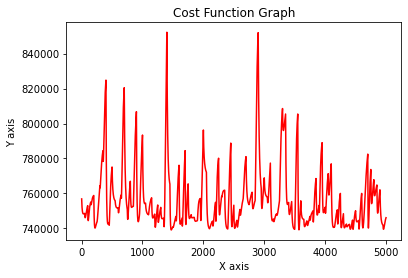

In [117]:
import matplotlib.pyplot as plt
 
# data to be plotted
x = np.arange(1, len(final_costs)+1)
y = np.array(final_costs)
 
# plotting
plt.title("Cost Function Graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="red")
plt.show()

## Taking a similar SGD from analyticsindia website to cross-check the plot

In [163]:
def grad_des(X, y, w, m, alpha, epoch):
    j = []
    w1 = []
    w1.append(w)
    for i in range(epoch):
        #d = stratified_spl(df)
        #X, y = sep(d)
        a = np.random.choice(X.shape[0], m, replace=False)
        x_random = X[a]
        y_random = y[a]
        n= len(x_random)
        #yp = sigmoid(X, w)
        yp = np.dot(w,x_random.T)
        def SME(X, y, w):
            n = len(X)
            yp = np.dot(w,x_random.T)
            return np.sum((yp-y)**2)/n
        for i in range(2):
#             print(x_random.shape)
#             print(y_random.shape)
            yp = yp.reshape(-1,1)
#             print(yp.shape)
            w[i] -= (alpha/n) * np.sum(-2*x_random[i]*(y_random-yp))
        w[2] -= (alpha/n) *np.sum(-2*(y_random-yp))
        w1.append(list(w))
        j.append(SME(x_random, y_random, w))
    return j, w1

In [164]:
w = np.random.rand(3)

In [168]:
print(X.shape)
print(y.shape)
print(w.shape)
print(k)
print(alpha)
print(m)

(349, 3)
(349, 1)
(3,)
100
0.001
50


In [169]:
results = grad_des(X, y, w, m, alpha, k)

In [171]:
#results[0]

In [162]:
# import matplotlib.pyplot as plt
 
# # data to be plotted

# x = np.arange(1, len(results[0])+1)
# y = np.array(results[0])
 
# # plotting
# plt.title("Cost Function Graph")
# plt.xlabel("X axis")
# plt.ylabel("Y axis")
# plt.plot(x, y, color ="red")
# plt.show()